In [729]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [730]:
ticker = "^BVSP"
data = yf.Ticker(ticker).history(period="2y")

data['Tomorrow_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

In [731]:
# Definindo datasets "separados" por um ano entre si para teste e treinamento

train = data.iloc[0:250, ]
test = data.iloc[250:500, ]

print(f"TREINO\n{train}\nTESTE\n{test}")

TREINO
                               Open      High       Low     Close    Volume  \
Date                                                                          
2022-06-28 00:00:00-03:00  100766.0  102237.0   99956.0  100591.0  10493900   
2022-06-29 00:00:00-03:00  100592.0  101313.0   99218.0   99622.0  10448100   
2022-06-30 00:00:00-03:00   99619.0   99619.0   97758.0   98542.0  14588800   
2022-07-01 00:00:00-03:00   98542.0   99340.0   97231.0   98954.0  11609800   
2022-07-04 00:00:00-03:00   98952.0   99353.0   98264.0   98609.0   6279300   
...                             ...       ...       ...       ...       ...   
2023-06-21 00:00:00-03:00  119623.0  120519.0  119332.0  120420.0  11736700   
2023-06-22 00:00:00-03:00  120420.0  120420.0  118018.0  118934.0  11831500   
2023-06-23 00:00:00-03:00  118959.0  119386.0  118178.0  118977.0  12845400   
2023-06-26 00:00:00-03:00  118977.0  119148.0  117491.0  118243.0  10456600   
2023-06-27 00:00:00-03:00  118246.0  119212.0

Text(0.5, 1.0, 'Preço de Fechamento do Ibovespa nos Últimos 2 Anos')

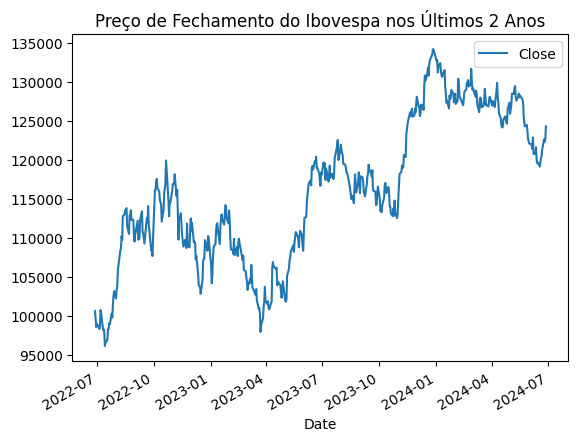

In [732]:
data.plot.line(y="Close", use_index=True)
plt.title("Preço de Fechamento do Ibovespa nos Últimos 2 Anos")

In [733]:
# Definindo testes e treinamentos

X_train = train[['Close', 'Volume']]
X_test = test[['Close', 'Volume']]
y_train = train['Tomorrow_Close']
y_test = test['Tomorrow_Close']

In [734]:
# Mostrar Treinamento e Teste

print(f"TREINO\n{X_train}\nTESTE\n{X_test}")

TREINO
                              Close    Volume
Date                                         
2022-06-28 00:00:00-03:00  100591.0  10493900
2022-06-29 00:00:00-03:00   99622.0  10448100
2022-06-30 00:00:00-03:00   98542.0  14588800
2022-07-01 00:00:00-03:00   98954.0  11609800
2022-07-04 00:00:00-03:00   98609.0   6279300
...                             ...       ...
2023-06-21 00:00:00-03:00  120420.0  11736700
2023-06-22 00:00:00-03:00  118934.0  11831500
2023-06-23 00:00:00-03:00  118977.0  12845400
2023-06-26 00:00:00-03:00  118243.0  10456600
2023-06-27 00:00:00-03:00  117523.0  13077000

[250 rows x 2 columns]
TESTE
                              Close    Volume
Date                                         
2023-06-28 00:00:00-03:00  116681.0  10646300
2023-06-29 00:00:00-03:00  118383.0  11055300
2023-06-30 00:00:00-03:00  118087.0         0
2023-07-03 00:00:00-03:00  119673.0   8907500
2023-07-04 00:00:00-03:00  119076.0   6555200
...                             ...       .

In [735]:
# Normalizando os dados

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [736]:
# Treinando o modelo

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [737]:
# Fazendo as previsões

y_pred = model.predict(X_test_scaled)
y_pred

array([116371.57741232, 118018.48254182, 117468.78483261, 119207.8135477 ,
       118577.19523279, 119137.71411359, 117097.26399073, 118501.03868132,
       117523.55843832, 116888.73551737, 117278.14930511, 118822.80048296,
       117322.36342734, 117792.34284144, 117437.93391261, 117187.37176503,
       117680.33226636, 119785.57600973, 120851.21964344, 121514.17098819,
       122010.64833261, 119555.18003626, 119691.58899563, 121420.38432594,
       120756.20186896, 120388.34089139, 120184.74779647, 119196.69892343,
       118921.64741042, 118679.12614517, 118048.05244604, 118025.91336648,
       117732.07566678, 116509.01409208, 115976.65306039, 115521.03796922,
       114787.72484425, 115146.9936696 , 114185.02821754, 115846.99410992,
       117791.62379836, 116668.66494538, 115525.43120749, 116769.64691706,
       118004.55715252, 117151.73213983, 115523.59935057, 117567.19020093,
       117303.14661296, 117002.17119935, 115684.61411633, 115000.95647858,
       116521.3574414 , 1

In [738]:
# Criterios de avaliacao do modelo

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"erro medio absoluto (MAE): {mae}")
print(f"erro quadratico medio (MSE): {mse}")
print(f"coeficiente de determinacao (R2): {r2}")
print(f"erro percentual absoluto medio (MAPE): {mape}%")

erro medio absoluto (MAE): 955.4212426543723
erro quadratico medio (MSE): 1467913.375487427
coeficiente de determinacao (R2): 0.9530983190315211
erro percentual absoluto medio (MAPE): 0.7733758956247945%


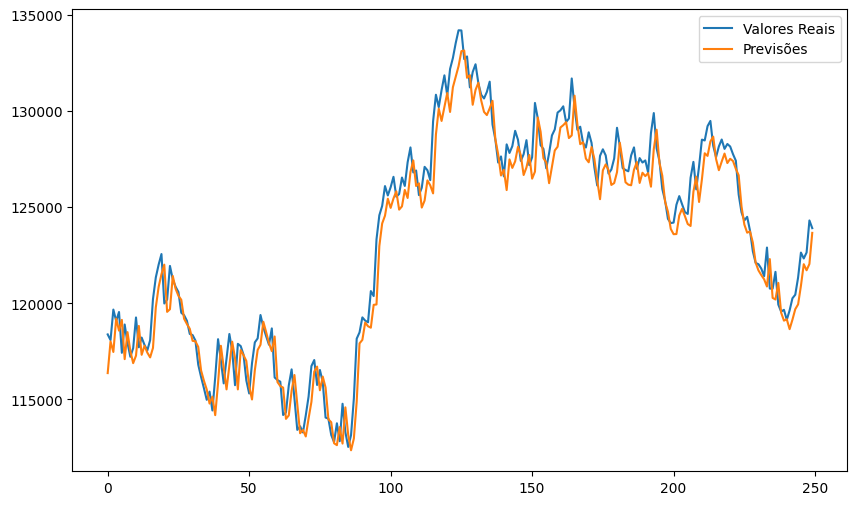

In [739]:
# Vizualicao das previsoes

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Previsões')
plt.legend()
plt.show()